# Exact diagonalization

The programme diagonalizes the Hamiltonian of a non-relativistic particle moving in a double well potential $V(x)=\lambda\left(x^2-\eta^2\right)^2$. The Hamiltonian matrix is built up explicitly, and the harmonic oscillator basis is exploited for diagonalization.

Input parameters, with default values:
- potential parameters: $\lambda=1$, $\eta=1.4$
- mass of the particle: $m=0.5$
- number of grid points for discretizing the Hamiltonian: $N_{grid}=1001$
- grid limits: $x_{min}=-5$, $x_{max}=5$
- frequency of the harmonic oscillator chosen as reference system: $\omega_0 = 4\eta = 5.6$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from tqdm.notebook import tqdm

In [3]:
# Parameters of the potential
Lambda = float(input("lambda = ") or 1)
eta = float(input("eta = ") or 1.4)
m = float(input("m = ") or 1/2)
hbar = 1

lambda = 
eta = 
m = 


In [4]:
# Parameters of the grid
Ngrid = int(input("Ngrid = ") or 1001)
xmin = float(input("xmin = ") or -5)
xmax = float(input("xmax = ") or 5)

Ngrid = 
xmin = 
xmax = 


## Plot of $V(x)$
We plot the potential $V(x)=\lambda\left(x^2-\eta^2\right)^2$ for the choice of parameters done before.

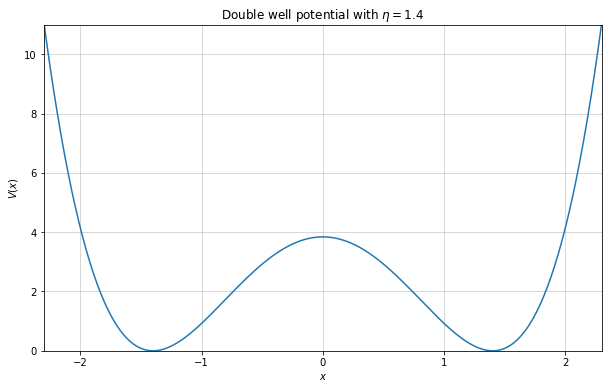

In [5]:
# Plotting the potential
xvec = np.linspace(xmin, xmax, Ngrid)       # Vector spanning from xmin to xmax with Ngrid points
Vx = Lambda*(xvec**2 - eta**2)**2

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(xvec, Vx)
ax.set_xlabel('$x$')
ax.set_ylabel('$V(x)$')
plt.xlim([-2.3, 2.3])
plt.ylim([0, 11])
plt.grid(linewidth = 0.5)
plt.title('Double well potential with $\eta =$' + str(eta));

## Diagonalization
In order to determine the eigenvalues and eigenvectors of the Hamiltonian of the anharmonic oscillator, we consider the harmonic oscillator basis and numerically diagonalize the Hamiltonian operator in that basis. This basis is defined by the eigenstates of

$$
H_{0}= \frac{p^2}{2m}+\frac{1}{2} m \omega_{0}^2 x^2
\qquad\mbox{which satisfy}\qquad
H_{0}\left|n\right> = \omega_{0}\left(n+ \frac{1}{2}\right)\left|n\right>
$$

The Hamiltonian of the anharmonic oscillator has a very simple structure in this basis. The only non-zero matrix elements are found to be:

$$
\left<n|H|n\right> = 3c^4\left[(n+1)^2+n^2\right]+Bc^2 (2n+1)+\omega_ {0}\left(n+\frac{1}{2}\right)+C
$$


$$
\left<n|H|n+2\right> = c^4 (4n+6) \sqrt{(n+1) (n+2)} +Bc^2\sqrt{(n+1) (n+2)}
$$

$$
\left<n|H|n+4\right> = c^4 \sqrt{(n+1) (n+2) (n+3) (n+4)}
$$
with:
$$
B = -2\eta^2-\frac{\omega_{0}^2}{4}\qquad\qquad C = \eta^4\qquad\qquad c = \frac{1}{\sqrt{\omega_{0}}}
$$

The value of $\omega_0$ is arbitrary, but the truncation error of the eigenvalues computed in a finite basis will depend on the choice of $\omega_0$; however, this dependence turns out to be quite weak.

In [14]:
# Initialization of the parameters
H = np.zeros((Ngrid, Ngrid))               # Hamiltonian matrix

w0 = float(input("w0 = ") or 4*eta)        # Frequency of the harmonic oscillator

B = -2*eta**2 - w0**2/4
C = eta**4
c = 1/(np.sqrt(w0))

w0 = 


In [15]:
# Build up H matrix for the anharmonic oscillator 
for n in range(Ngrid): 
    H[n, n] = 3*c**4*((n+1)**2+n**2) + B*c**2*(2*n+1) + w0*(n+0.5) + C                         # Matrix element <n|H|n>
    
for n in range(Ngrid-2):
    H[n, n+2] = H[n+2, n]= c**4*(4*n+6)*np.sqrt((n+1)*(n+2)) + B*c**2*np.sqrt((n+1)*(n+2))     # Matrix element <n|H|n+2>
    
for n in range(Ngrid-4):
    H[n, n+4] = H[n+4, n] = c**4*np.sqrt((n+1)*(n+2)*(n+3)*(n+4))                              # Matrix element <n|H|n+4>
    
w, v = LA.eig(H)              # Diagonalizing the H matrix

sortinds = np.argsort(w)      # Returns the indices that would sort the array w
EigVals = w[sortinds]         # Eigenvalues sorting
EigVecs = v[:,sortinds]       # Corresponding eigenvectors sorting

Number of eigenvalues to be plotted = 


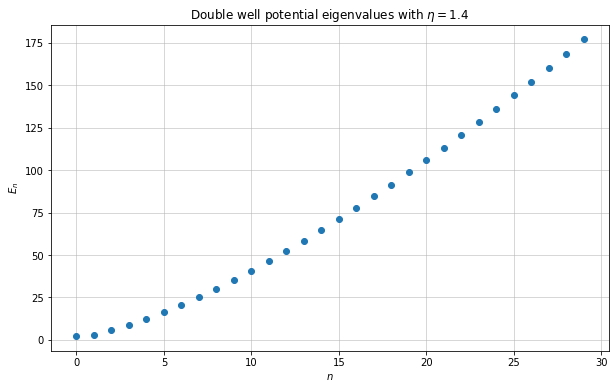

In [17]:
# Plotting the eigenvalues
Neig = int(input("Number of eigenvalues to be plotted = ") or 30)      # Number of eigenvalues to be plotted
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(EigVals[0:Neig], 'o')
ax.set_ylabel('$E_n$')
ax.set_xlabel('$n$')
plt.grid(linewidth = 0.5)
plt.title('Double well potential eigenvalues with $\eta =$' + str(eta));

### Plotting the first order wavefunction
In order to plot the first wavefunction, we need to use the explicit form of the wavefunctions of the reference system, that is, the Hermite polynomials. They can be computed exaclty using their recursive definition: $H_0=1$, $H_1=2x$, and:

$$
H_i = 2xH_{i-1}-2(i-1)H_{i-2}\qquad\qquad i>1
$$

In the following, we will use the following rescaled form of the polynomials, which already includes normalization constants:

$$
H_i = \frac{1}{\sqrt{i}}\left[xH_{i-1}-\frac{1}{2}\sqrt{i-1}H_{i-2}\right]\qquad\qquad i>1
$$

We then compute the harmonic oscillator wavefunction of order $i$ as:

$$
\psi_i(x) = \left(\frac{\omega_0}{2\pi}\right)^{\frac{1}{4}}\ 2^{\frac{i}{2}}\ H_i\left(\sqrt{\frac{\omega_0}{2}}x\right)\ \mbox{exp}\left(-\frac{m\omega_0}{2}x^2\right)
$$

In [18]:
# Functions that compute the Hermite polynomials p(i = 0,...,n) = H_i(x)
def hermite3(n, x, p):
    p = np.zeros(n+1)
    p[0] = 1
    p[1] = x
    
    for i in range (2, n+1):
        p[i] = (x*p[i-1] - np.sqrt(i-1)*p[i-2]/2) / np.sqrt(float(i))

    return p


# Harmonic oscillator wave function psi(i = 0,..,n) = psi_i(x)
def psiosc(n, x, psi):
    psi = np.zeros(n+1)           # Wave function
    h = np.zeros(n+1)             # Hermite polynomials 
    
    y = np.sqrt(w0/2)*x
    h = hermite3(n, y, h)
    
    for i in range(n+1):
        xnorm = (w0/(2*np.pi))**0.25*2**(i/2)
        psi[i] = xnorm*h[i]*np.exp(-m*w0/2*x**2)
        
    return psi 

To plot the ground state wavefunction $\Psi_0(x)$ for the anharmonic oscillator we now need to multiply the eigenvenctors found above by the basis we used to diagonalize the Hamiltonian matrix:
$$
\Psi_0(x)= \sum_{j=0}^{N-1} v_0(x_j)\ \psi_0(x_j)
$$

  0%|          | 0/1001 [00:00<?, ?it/s]

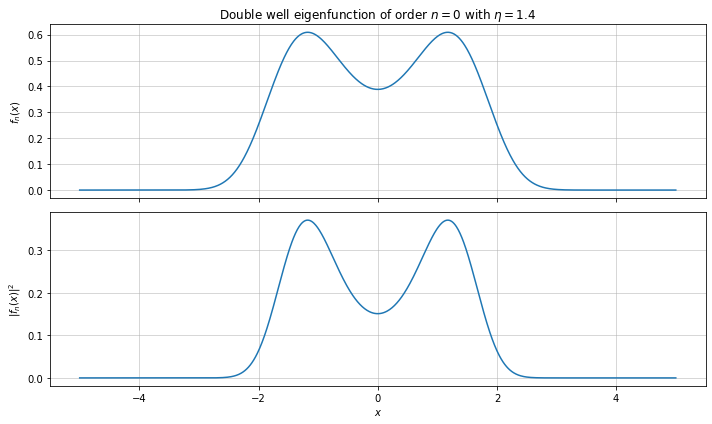

In [19]:
# Plotting the ground state wavefunction psix
psi = np.zeros(Ngrid)        # Harmonic oscillator wave function
psix = np.zeros(Ngrid)       # Anharmonic oscillator wave function

for k in tqdm(range(Ngrid), leave = False):
    psi = psiosc(Ngrid-1, xvec[k], psi)

    for j in range(Ngrid-1):
        psix[k] = psix[k] + EigVecs[j,0]*psi[j]
    
    
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (10,6))
ax1.plot(xvec, psix)
ax1.set(title='Double well eigenfunction of order $n=0$ with $\eta=$' + str(eta));
ax1.set_ylabel('$f_n(x)$')
ax1.grid(linewidth = 0.5)

ax2.plot(xvec, np.power(np.abs(psix), 2))
ax2.set_ylabel('$|f_n(x)|^2$')
ax2.set_xlabel('$x$')
ax2.grid(linewidth = 0.5)
fig.tight_layout()

## Eigenvalues as a function of $\eta$
The procedure can be repeated for different values of $\eta$, to show that for $\eta\to\infty$ the odd and even eigenvalues tend to be degenerate. Indeed, for $\eta\to \infty$ we have that the wavefunctions of the ground state and the first excited state are approximately given by:

$$
\psi_{0,1} (x) = \frac{1}{\sqrt{2}}\left[\psi_-(x)\pm \psi_+(x)\right]
$$

where $\psi_\pm(x)$ are the ground state wavefunctions in the left and right minimum of the potential, so odd and even eigenvalues become equivalent.

Input parameters:
- bounds on $\eta$: $\eta_{min}$, $\eta_{max}$
- number of $\eta$ values: $N_{steps}$
- number of eigenvalues to be plotted: $N_{eig}$

<img src="flow1.jpg" width="400"/>

In [20]:
def diag(etaMin, etaMax, Nsteps, Neig):
    
    eta_vector = np.zeros(Nsteps+1)
    eig_vector = np.zeros((Neig, Nsteps+1))
    
    for step in tqdm(range(Nsteps+1), leave = False):
        eta = etaMin + step*(etaMax-etaMin)/Nsteps
        
        h = np.zeros((Ngrid, Ngrid))
        w0 = 4*eta
        B = -2*eta**2 - w0**2/4
        C = eta**4
        c = 1/(np.sqrt(w0))
        
        for n in range (Ngrid):
            h[n, n] = 3*c**4*((n+1)**2+n**2) + B*c**2*(2*n+1) + w0*(n+0.5) + C
    
    
        for n in range (Ngrid-2):
            h[n, n+2] = h[n+2, n]= c**4*(4*n+6)*np.sqrt((n+1)*(n+2)) + B*c**2*np.sqrt((n+1)*(n+2))
    

        for n in range (Ngrid-4):
            h[n, n+4] = h[n+4, n]= c**4*np.sqrt((n+1)*(n+2)*(n+3)*(n+4))
   
        
        w, v = LA.eig(h)
        
        sortinds = np.argsort(w)
        EigVals = w[sortinds]
        
        eta_vector[step] = eta
        
        for eig in range(Neig):
            eig_vector[eig][step] = EigVals[eig]

    fig, ax = plt.subplots(figsize = (10,6))
    
    for eig in range(Neig):
        ax.plot(eta_vector, eig_vector[eig])
        
    ax.set_ylabel('$E$')
    ax.set_xlabel('$\eta$')
    plt.grid(linewidth=0.5)
    plt.title('Double well potential eigenvalues as a function of $\eta$');

etaMin = 
etaMax = 
Nsteps = 
Neig = 


  0%|          | 0/51 [00:00<?, ?it/s]

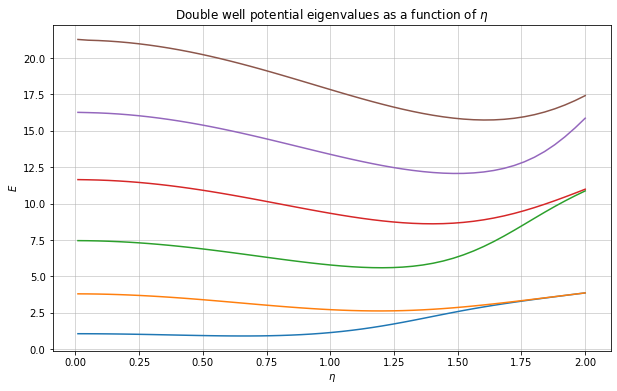

In [21]:
etaMin = float(input("etaMin = ") or 0.01)
etaMax = float(input("etaMax = ") or 2)
Nsteps = int(input("Nsteps = ") or 50)
Neig = int(input("Neig = ") or 6)

diag(etaMin, etaMax, Nsteps, Neig)